# Spotify and Youtube EDA-Capstone Project

In [16]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

from IPython.display import Image

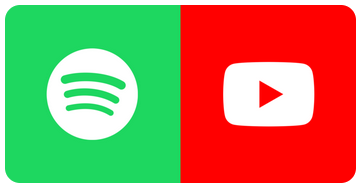

In [17]:
image_path = "C:/Users/Elif/Desktop/spt.png"
Image(image_path)

In [3]:
df = pd.read_csv(r"C:\Users\Elif\Desktop\Bitirme Projesi\asset-v1 Kodlasam+VAM-03+2023_02+type@asset+block@asset-v1_Kodlasam_MS01_2023_06_type_asset_block_Spotify_Youtube.csv")


In [10]:
df.head()

Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   
4                                       Gorillaz      album   

                                    Uri  Danceability  Energy   Key  ...  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4  spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   

                                   Url_youtube  \
0  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  https://www.youtube.com/watch?v=yYDmaexVHic   
2  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3  https://www.youtube.com/watch?v=04mfKJWDSzI   
4  https://www.youtube.com/watch?v=1V_xRb0x9aw   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   
4  6197318.0  155930.0  The official music video for Gorillaz - Clint ...   

   Licensed official_video        Stream  
0      True           True  1.040235e+09  
1      True           True  3.100837e+08  
2      True           True  6.306347e+07  
3      True           True  4.346636e+08  
4      True           True  6.172597e+08  

[5 rows x 28 columns]

In [5]:
df.shape


(20718, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [7]:
sütun_adları = df.columns.tolist()
print("Sütun Adları:", sütun_adları)

Sütun Adları: ['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description', 'Licensed', 'official_video', 'Stream']


In [8]:
# Sadece sayısal sütunları seçerek açıklayıcı istatistikler hesaplayalım.
numerical_columns = df.select_dtypes(include=['float64'])
numerical_description = numerical_columns.describe()
print(numerical_description)

       Danceability        Energy           Key      Loudness   Speechiness  \
count  20716.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean       0.619777      0.635250      5.300348     -7.671680      0.096456   
std        0.165272      0.214147      3.576449      4.632749      0.111960   
min        0.000000      0.000020      0.000000    -46.251000      0.000000   
25%        0.518000      0.507000      2.000000     -8.858000      0.035700   
50%        0.637000      0.666000      5.000000     -6.536000      0.050500   
75%        0.740250      0.798000      8.000000     -4.931000      0.103000   
max        0.975000      1.000000     11.000000      0.920000      0.964000   

       Acousticness  Instrumentalness      Liveness       Valence  \
count  20716.000000      20716.000000  20716.000000  20716.000000   
mean       0.291535          0.055962      0.193521      0.529853   
std        0.286299          0.193262      0.168531      0.245441   
min        0

In [18]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
20713    False
20714    False
20715    False
20716    False
20717    False
Length: 20718, dtype: bool

In [10]:
df.isnull().sum()


Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [11]:
df.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

## Veri temizleme ve Dönüştürme

In [19]:
##Kullanmayacağımız gereksiz sütunları silelim
df.drop(['Unnamed: 0','Url_spotify','Uri', 'Url_youtube', 'Title', 'Description'],axis =1, inplace = True)

In [20]:
##Tablodaki Eksik Değerleri Kaldıralım
df.dropna(inplace = True)

In [21]:
df.isnull().sum()


Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

# Keşifsel Veri Analizi(EDAs)


In [22]:
print(df.columns)


Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views',
       'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')


In [23]:
import plotly.graph_objects as go
import pandas as pd

# Her bir sanatçının Energy, Danceability ve Valence özelliklerinin ortalamasını hesaplayalım
artist_metrics = df.groupby('Artist')[['Energy', 'Danceability', 'Valence']].mean().reset_index()

# En üst 20 sanatçıyı seçelim
top_20_artists = artist_metrics.sort_values(by='Energy', ascending=False).head(20)

# Canlı renkler listesi
colors = ['lightgreen', 'limegreen', 'darkgreen']

# Plotly ile her bir metrik için ayrı grafik oluşturalım

# Energy metriği için grafik
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=top_20_artists['Artist'], y=top_20_artists['Energy'], name='Enerji Seviyesi', marker_color=colors[0],
text=top_20_artists['Energy'], textposition='outside', texttemplate='%{text:.2f}'))
fig1.update_layout(title='En İyi 20 Sanatçıya Göre Ortalama Enerji Seviyesi', xaxis_title='Sanatçı', 
yaxis_title='Enerji Seviyesi')

# Danceability metriği için grafik
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=top_20_artists['Artist'], y=top_20_artists['Danceability'], name='Dans Edilebilirlik',
marker_color=colors[1], text=top_20_artists['Danceability'], textposition='outside', texttemplate='%{text:.2f}'))
fig2.update_layout(title='En İyi 20 Sanatçıya Göre Ortalama Dans Edilebilirlik', xaxis_title='Sanatçı',
yaxis_title='Dans Edilebilirlik')

# Valence metriği için grafik
fig3 = go.Figure()
fig3.add_trace(go.Bar(x=top_20_artists['Artist'], y=top_20_artists['Valence'], name='Müzikal Pozitiflik',
marker_color=colors[2], text=top_20_artists['Valence'], textposition='outside', texttemplate='%{text:.2f}'))
fig3.update_layout(title='En İyi 20 Sanatçıya Göre Ortalama Müzikal Pozitiflik', xaxis_title='Sanatçı',
yaxis_title='Müzikal Pozitiflik')

# Grafikleri düzenleme
fig1.show()
fig2.show()
fig3.show()



In [24]:
import plotly.graph_objects as go

# Albüm türlerini say ve veri kümesini oluştur
album_types = df['Album_type'].value_counts().reset_index()
album_types.columns = ['Album Type', 'Count']

# Verileri hazırla
labels = album_types['Album Type'].tolist()
sizes = album_types['Count'].tolist()

# Pasta grafiğini oluştur
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, 
                             textinfo='label+percent', 
                             insidetextorientation='radial',
                             hole=0.3,
                             marker=dict(colors=['orange', 'darkgreen', 'lightgreen']))])

# Grafiği düzenle
fig.update_layout(title='Albüm Türlerine Göre Dağılım')

# Grafiği göster
fig.show()


In [25]:
import plotly.graph_objects as go

# Scatter plot oluştur
fig = go.Figure(data=go.Scatter(x=df['Views'], y=df['Likes'], 
                                 mode='markers', marker=dict(color='green', opacity=0.7, line=dict(color='black', width=1))))

# Trendline ekle
import numpy as np
z = np.polyfit(df['Views'], df['Likes'], 1)
p = np.poly1d(z)
fig.add_trace(go.Scatter(x=df['Views'], y=p(df['Views']), mode='lines', line=dict(color='orange', dash='dash')))

# Grafiği düzenle
fig.update_layout(title='Görüntüler ile Beğeniler Arasındaki İlişki',
                  xaxis_title='Görüntüler',
                  yaxis_title='Beğeniler',
                  showlegend=False,
                  plot_bgcolor='white')

# Grafiği göster
fig.show()


In [26]:
import plotly.graph_objects as go

# Scatter plot oluştur
fig = go.Figure(data=go.Scatter(x=df['Views'], y=df['Comments'], 
                                 mode='markers', marker=dict(color='darkorange', opacity=0.7, line=dict(color='black', width=1))))

# Trendline ekle
import numpy as np
z = np.polyfit(df['Views'], df['Comments'], 1)
p = np.poly1d(z)
fig.add_trace(go.Scatter(x=df['Views'], y=p(df['Views']), mode='lines', line=dict(color='green', dash='dash')))

# Grafiği düzenle
fig.update_layout(title='Görüntüler ile Yorumlar Arasındaki İlişki',
                  xaxis_title='Görüntüler',
                  yaxis_title='Yorumlar',
                  showlegend=False,
                  plot_bgcolor='white')

# Grafiği göster
fig.show()


In [27]:
import plotly.graph_objects as go
import pandas as pd

# Sayısal sütunları seç ve korelasyon matrisini hesaplayalım
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr().round(2)

# Isı haritası oluşturma
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                 x=correlation_matrix.columns,
                                 y=correlation_matrix.index,
                                 colorscale='Oranges',  
                                 colorbar=dict(title='Korelasyon')))

# Kareler üzerine sayısal değerleri ekleyelim
for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.values[i, j]
        if value > 0.95:
            color = 'white'
        else:
            color = 'black'
        fig.add_annotation(x=correlation_matrix.columns[j], y=correlation_matrix.index[i],
                           text=str(value),
                           showarrow=False, font=dict(color=color, size=10),
                           xanchor='center', yanchor='middle')

# Grafiği düzenleme
fig.update_layout(title='Kolonlar Arasındaki Korelasyon Matrisi')

# Grafiği göster
fig.show()
